In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'acc':[],
           'f1':[],
           'r':[]}

In [4]:
ranks = [4,8,16,32]
lora_alpha = 8
lora_dropout = 0.0
lr = 1.0e-4
g = 2
wd = 0.01

for r in ranks:
    print(f'Grid search {model_checkpoint}, lr: {lr}. Focal loss gamma: {g}. Weight decay {wd}. Lora rank: {r}')
    data = ClimateDataset(model_to_train=1,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                                num_labels=data.num_labels,
                                lora=True,
                                r=r,
                                alpha=lora_alpha,
                                dropout=lora_dropout)
    trainer = Engine(epochs=10,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    acc, f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          early_stop=3,
                          gamma=g)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['r'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search bert-base-uncased, lr: 0.0001. Focal loss gamma: 2. Weight decay 0.01. Lora rank: 4


Map:   0%|          | 0/256 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.3689	Val Loss:	0.7221	Accuracy:	0.2801	F1:	0.2454
2 / 10: Train Loss:	0.3460	Val Loss:	0.6915	Accuracy:	0.5011	F1:	0.4996
3 / 10: Train Loss:	0.3311	Val Loss:	0.6633	Accuracy:	0.6346	F1:	0.6170
4 / 10: Train Loss:	0.3057	Val Loss:	0.6111	Accuracy:	0.7046	F1:	0.6656
5 / 10: Train Loss:	0.2855	Val Loss:	0.5719	Accuracy:	0.7330	F1:	0.6821
6 / 10: Train Loss:	0.2788	Val Loss:	0.5695	Accuracy:	0.7374	F1:	0.6935
7 / 10: Train Loss:	0.2594	Val Loss:	0.5522	Accuracy:	0.7440	F1:	0.7061
8 / 10: Train Loss:	0.2461	Val Loss:	0.5274	Accuracy:	0.7768	F1:	0.7353
9 / 10: Train Loss:	0.2304	Val Loss:	0.5205	Accuracy:	0.7702	F1:	0.7333
10 / 10: Train Loss:	0.2135	Val Loss:	0.5132	Accuracy:	0.7681	F1:	0.7342
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.54      0.79      0.64       119
      struct       0.91      0.76      0.83       338

    accuracy                           0.77       457
   macro avg      

Map:   0%|          | 0/457 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.3689	Val Loss:	0.7222	Accuracy:	0.2779	F1:	0.2423
2 / 10: Train Loss:	0.3455	Val Loss:	0.6906	Accuracy:	0.5098	F1:	0.5076
3 / 10: Train Loss:	0.3279	Val Loss:	0.6571	Accuracy:	0.6368	F1:	0.6173
4 / 10: Train Loss:	0.3004	Val Loss:	0.6055	Accuracy:	0.7046	F1:	0.6668
5 / 10: Train Loss:	0.2820	Val Loss:	0.5707	Accuracy:	0.7309	F1:	0.6814
6 / 10: Train Loss:	0.2748	Val Loss:	0.5691	Accuracy:	0.7396	F1:	0.6978
7 / 10: Train Loss:	0.2569	Val Loss:	0.5480	Accuracy:	0.7484	F1:	0.7079
8 / 10: Train Loss:	0.2431	Val Loss:	0.5280	Accuracy:	0.7768	F1:	0.7374
9 / 10: Train Loss:	0.2264	Val Loss:	0.5157	Accuracy:	0.7681	F1:	0.7323
10 / 10: Train Loss:	0.2090	Val Loss:	0.5104	Accuracy:	0.7637	F1:	0.7283
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.53      0.77      0.63       119
      struct       0.90      0.76      0.83       338

    accuracy                           0.76       457
   macro avg      

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.3689	Val Loss:	0.7219	Accuracy:	0.2779	F1:	0.2423
2 / 10: Train Loss:	0.3452	Val Loss:	0.6891	Accuracy:	0.5120	F1:	0.5099
3 / 10: Train Loss:	0.3275	Val Loss:	0.6557	Accuracy:	0.6565	F1:	0.6345
4 / 10: Train Loss:	0.3003	Val Loss:	0.6047	Accuracy:	0.7177	F1:	0.6772
5 / 10: Train Loss:	0.2820	Val Loss:	0.5703	Accuracy:	0.7309	F1:	0.6827
6 / 10: Train Loss:	0.2753	Val Loss:	0.5694	Accuracy:	0.7374	F1:	0.6947
7 / 10: Train Loss:	0.2566	Val Loss:	0.5475	Accuracy:	0.7440	F1:	0.7040
8 / 10: Train Loss:	0.2427	Val Loss:	0.5237	Accuracy:	0.7681	F1:	0.7293
9 / 10: Train Loss:	0.2271	Val Loss:	0.5166	Accuracy:	0.7527	F1:	0.7172
10 / 10: Train Loss:	0.2074	Val Loss:	0.5111	Accuracy:	0.7571	F1:	0.7241
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.52      0.79      0.63       119
      struct       0.91      0.75      0.82       338

    accuracy                           0.76       457
   macro avg      

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 10: Train Loss:	0.3689	Val Loss:	0.7221	Accuracy:	0.2801	F1:	0.2454
2 / 10: Train Loss:	0.3457	Val Loss:	0.6910	Accuracy:	0.5055	F1:	0.5037
3 / 10: Train Loss:	0.3296	Val Loss:	0.6607	Accuracy:	0.6477	F1:	0.6277
4 / 10: Train Loss:	0.3033	Val Loss:	0.6091	Accuracy:	0.7024	F1:	0.6626
5 / 10: Train Loss:	0.2846	Val Loss:	0.5741	Accuracy:	0.7243	F1:	0.6743
6 / 10: Train Loss:	0.2776	Val Loss:	0.5714	Accuracy:	0.7374	F1:	0.6958
7 / 10: Train Loss:	0.2591	Val Loss:	0.5502	Accuracy:	0.7418	F1:	0.7031
8 / 10: Train Loss:	0.2450	Val Loss:	0.5289	Accuracy:	0.7659	F1:	0.7262
9 / 10: Train Loss:	0.2301	Val Loss:	0.5196	Accuracy:	0.7593	F1:	0.7232
10 / 10: Train Loss:	0.2104	Val Loss:	0.5120	Accuracy:	0.7615	F1:	0.7272
best (higgest macro f1-score) val results:
              precision    recall  f1-score   support

       bknow       0.53      0.78      0.63       119
      struct       0.91      0.75      0.82       338

    accuracy                           0.76       457
   macro avg      

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

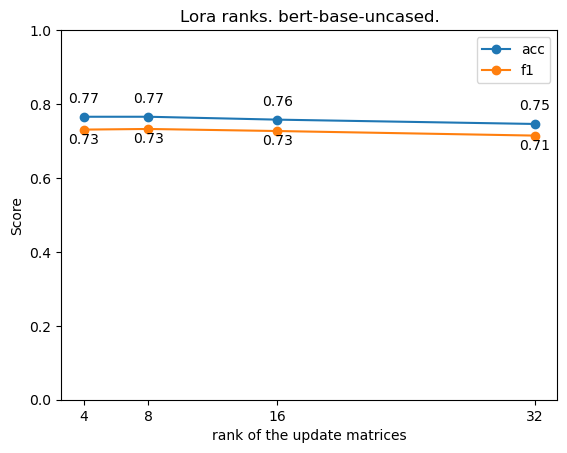

In [7]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='r', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["r"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["r"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['r'], [val for val in df['r']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('rank of the update matrices')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Lora ranks. {model_checkpoint}.')